In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.preprocessing import minmax_scale

from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score
from tslearn.utils import to_time_series_dataset

import sys
import os
sys.path.append(os.path.abspath('../utils'))
from preprocessing import Preprocessor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
preprocessor = Preprocessor()
zpp4 = preprocessor.zpp4_preprocessing()
spec = preprocessor.spec_preprocessing()

Duplicate rows cleaning: 620it [00:02, 283.28it/s]


In [5]:
spec.supplier.unique()

array(['50 ЛЕТ ОКТЯБРЯ ООО', 'АВАНГАРД ДРУЖБА ООО', 'АВАНГАРД ООО', ...,
       'Ярушина В.С. ИП Глава К(Ф)Х', 'Яценко В.В. ИП Глава К(Ф)Х',
       'Яцкий И.В. ИП Глава К(Ф)Х'], dtype=object)

In [16]:
[len(zpp4.loc[zpp4['supplier'] == supplier]) for supplier in zpp4.supplier.unique()]

In [17]:
zpp4.loc[zpp4['supplier'] == '50 ЛЕТ ОКТЯБРЯ ООО']

,date,supplier,basis,spec_date,contract_price,estimated_price,contract_price1,estimated_price1,quantity,sum,price_change,id
38362,2022-12-21,50 ЛЕТ ОКТЯБРЯ ООО,"Юг Руси, АО",2022-12-19,25.0,23.66,25.0,22.90,30.60,700740.0,-8.40,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2022-12-19"
38363,2022-12-21,50 ЛЕТ ОКТЯБРЯ ООО,"Юг Руси, АО",2022-12-19,25.0,23.66,25.0,24.46,29.35,717901.0,-2.16,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2022-12-19"
42208,2023-01-25,50 ЛЕТ ОКТЯБРЯ ООО,"Юг Руси, АО",2023-01-24,27.5,25.60,27.5,25.60,30.37,777472.0,-6.91,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-01-24"
42657,2023-01-28,50 ЛЕТ ОКТЯБРЯ ООО,"Юг Руси, АО",2023-01-24,27.5,26.72,27.5,26.72,29.18,779689.6,-2.84,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-01-24"
59127,2023-04-28,50 ЛЕТ ОКТЯБРЯ ООО,"Юг Руси, АО",2023-04-28,23.0,18.80,23.0,18.80,28.71,539748.0,-18.26,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-04-28"
59153,2023-04-29,50 ЛЕТ ОКТЯБРЯ ООО,"Юг Руси, АО",2023-04-29,23.0,18.88,23.0,19.58,26.52,519261.6,-14.87,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-04-29"
59154,2023-04-29,50 ЛЕТ ОКТЯБРЯ ООО,"Юг Руси, АО",2023-04-29,23.0,18.88,23.0,18.49,32.15,594453.5,-19.61,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-04-29"
59155,2023-04-29,50 ЛЕТ ОКТЯБРЯ ООО,"Юг Руси, АО",2023-04-29,23.0,18.88,23.0,18.68,30.71,573662.8,-18.78,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-04-29"
59238,2023-05-01,50 ЛЕТ ОКТЯБРЯ ООО,"Юг Руси, АО",2023-05-01,23.0,17.49,23.0,17.49,28.03,490244.7,-23.96,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-05-01"
59250,2023-05-02,50 ЛЕТ ОКТЯБРЯ ООО,"Юг Руси, АО",2023-05-02,23.0,19.55,23.0,19.37,31.60,612092.0,-15.78,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-05-02"


In [4]:
spec.head(2)

,supplier,supplier_status,item,basis,spec_date,delivery_period_end,payment_terms,option,logistics,declared_price,consent_price,spec_price,volume_requested,volume_contracted,bids_submitted,bids_contracted,id
0,50 ЛЕТ ОКТЯБРЯ ООО,СХТП,подсолнечник,"Юг Руси, АО",2022-12-19,2022-12-25,По факту,15.0,0.0,25.5,25.0,25.0,40.0,60.0,1.0,1.0,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2022-12-19"
1,50 ЛЕТ ОКТЯБРЯ ООО,СХТП,подсолнечник,"Юг Руси, АО",2023-01-24,2023-02-12,По факту,15.0,0.0,27.5,27.5,27.5,50.0,59.0,1.0,1.0,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-01-24"


In [5]:
zpp4.head(2)

,date,supplier,basis,spec_date,contract_price,estimated_price,contract_price1,estimated_price1,quantity,sum,price_change,id
0,2022-07-02,СОЮЗ ООО Ростов,"Юг Руси, АО",2022-06-15,30.0,30.29,30.0,30.32,27.05,820156.0,1.07,"СОЮЗ ООО Ростов_Юг Руси, АО_2022-06-15"
1,2022-07-02,СОЮЗ ООО Ростов,"Юг Руси, АО",2022-06-15,30.0,30.29,30.0,31.02,28.78,892755.6,3.40,"СОЮЗ ООО Ростов_Юг Руси, АО_2022-06-15"


In [9]:
# supplier = zpp4.supplier.unique()[260]
# for supplier in zpp4.supplier.unique()[:5]:
#     plt.plot(
#         zpp4[zpp4.supplier == supplier].date.values,
#         zpp4[zpp4.supplier == supplier].price_change.values,
#     )

In [37]:
# prepare data
suppliers = zpp4['supplier'].unique()
features = ['quantity', 'price_change']
data = []
suppliers = []

for supplier in zpp4['supplier'].unique()[:20]:
    series = zpp4[zpp4['supplier'] == supplier][features].values
    if len(series) > 5:
        suppliers.append(supplier)
        series = minmax_scale(series).tolist()
        data.append(series)
X = to_time_series_dataset(data)

In [38]:
len(data)

18

In [46]:
# train clastirization
n_clasters = 3
km = TimeSeriesKMeans(
    n_clusters=n_clasters,
    metric="dtw",
    max_iter=20,
    max_iter_barycenter=10,
    random_state=0
).fit(X)
y_pred = km.predict(X)

In [43]:
silhoutte = []
for i in tqdm(range(2, 9)):
    km = TimeSeriesKMeans(
        n_clusters=i,
        metric="dtw",
        max_iter=20,
        max_iter_barycenter=10,
        random_state=0
    ).fit(X)
    y_pred = km.predict(X)
    score = silhouette_score(X, y_pred, metric="dtw")
    silhoutte.append(score)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:00<00:00, 17.17s/it]


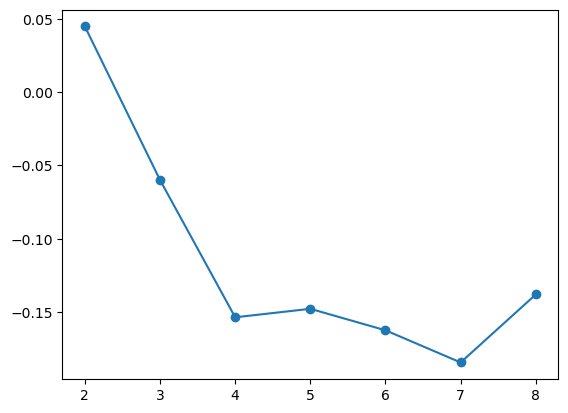

In [44]:
plt.plot(range(2, 9), silhoutte, marker='o')

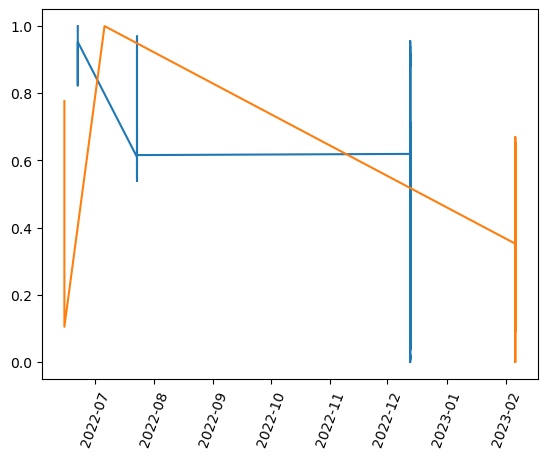

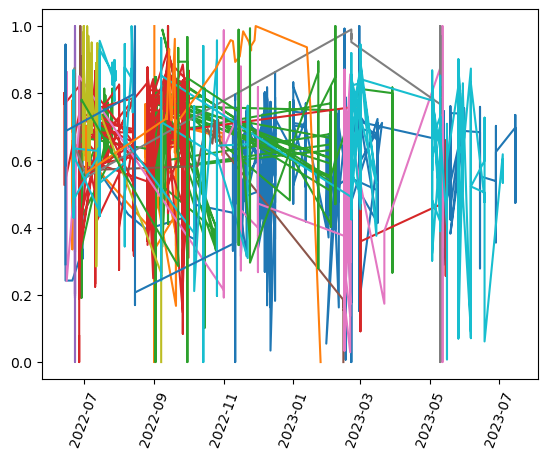

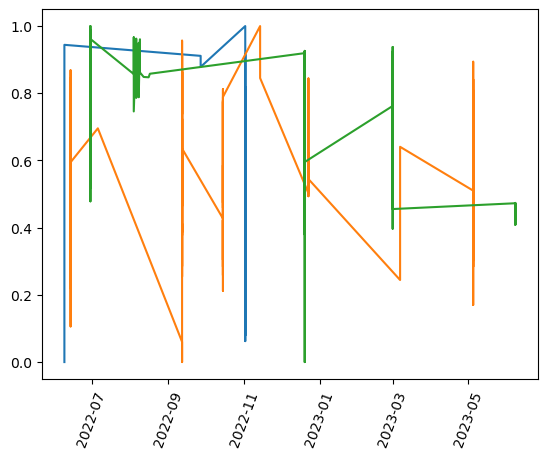

In [53]:
for cluster in range(n_clasters):
    indexes = np.where(y_pred == cluster)[0]
    series = [data[i] for i in indexes]
    cluster_suppliers = [suppliers[i] for i in indexes]
    for supplier, seria in zip(cluster_suppliers, series):

        plt.xticks(rotation=70)
        # plt.xlim((data['Date Order was placed'].min(), data['Date Order was placed'].max()))
        plt.locator_params(axis='x', nbins=10)
        plt.plot(
            zpp4[zpp4['supplier'] == supplier]['spec_date'].values,
            [i[0] for i in seria],
            # marker='o'
        )
    plt.show()

In [50]:
[i[0] for i in seria]

[1.0,
 0.823321554770318,
 0.9528857479387517,
 0.6101295641931687,
 0.5865724381625442,
 0.5901060070671379,
 0.5394581861012956,
 0.7290930506478212,
 0.9328621908127211,
 0.9693757361601886,
 0.8810365135453476,
 0.6160188457008245,
 0.6195524146054182,
 0.36631330977620735,
 0.7137809187279153,
 0.036513545347467535,
 0.36513545347467613,
 0.008244994110718551,
 0.021201413427561766,
 0.0,
 0.9552414605418141,
 0.8798586572438164,
 0.9175500588928153,
 0.8680800942285042,
 0.6183745583038872,
 0.9375736160188458]